#**Descrição**

Nessa tarefa você vai construir modelos de regressão para a previsão de CRA usando notas de disciplinas do primeiro período do curso de computação.

- Copie esse notebook onde os dados já foram carregados e particionados em treino e teste.
- Construa um gráfico de correlação mostrando as correlações entre cada variável independente com a variável dependente (nos dados de treino);
- Escolha a variável melhor correlacionada e construa uma regressão simples. Meça o RMSE no treino e teste.
- Mesma coisa que item 3 acima mas agora com as três variáveis melhores correlacionadas.
- Mesma coisa que os itens 3 e 4 acima mas agora com todas as variáveis.
Compare todos os modelos em termos de RMSE e R2 no treino e teste. Qual o melhor modelo? Por que você acha que é o caso? 
- Faça 10 partições aleatórias de treino e teste.
- Para cada partição faça:
 - Calcule a média dos erros de treino e teste para os modelos criados nos itens 3, 4 e 5 acima.
 - Plote um gráfico de barras mostrando esses resultados para cada modelo.
- Entrega
 - A entrega deve ser um link do notebook no Colab (compartilhado comigo ou livre para acesso) com código python e texto explicativo para cada questão. Estruture o notebook destacando as perguntas e a solução.

# Dependências

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregando os dados

In [2]:
url = 'https://drive.google.com/file/d/1AWZQSho1ArFBxwLKu0-hSBOSNdc_jKEt/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,matricula,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Cálculo1
0,0cc3d63edf0b986cb87e345972857e15,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,8.7
1,0d78246db769dc958ce19fc414050b2a,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,7.0
2,0f5bb983df06b90337dc2c6301fef3f6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,8.6
3,1307a4421a67a497cea198e8ccfb97ee,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,7.8
4,1432d50cf8519694ab992c414d90a130,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,5.2


# Sumário dos Dados

In [3]:
df.describe()

,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Cálculo1
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.280682,8.480114,7.407955,8.172727,7.597727,6.323864,6.764773,7.941364,7.196591,7.107955,8.631818,7.332535,7.200000
std,1.404169,0.984522,1.346278,0.894007,1.371799,1.293662,1.228403,0.990478,1.277970,0.908987,0.969008,0.849758,1.228493
min,5.000000,6.200000,5.000000,5.900000,5.000000,5.000000,5.000000,5.300000,5.000000,5.000000,5.000000,4.874468,5.000000
25%,6.275000,7.700000,6.500000,7.500000,6.600000,5.100000,5.675000,7.300000,6.300000,7.000000,8.200000,6.841484,6.275000
50%,7.100000,8.500000,7.750000,8.200000,7.800000,5.800000,6.750000,7.950000,7.200000,7.000000,8.900000,7.274746,7.200000
75%,8.325000,9.300000,8.325000,8.800000,8.600000,7.500000,7.600000,8.800000,8.200000,7.500000,9.200000,7.883292,8.125000
max,10.000000,10.000000,10.000000,10.000000,10.000000,9.300000,9.600000,9.600000,10.000000,9.100000,9.700000,9.090588,9.800000


# Partição Treino/Teste

In [65]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [66]:
x_train

,Cálculo1,LPT,P1,IC,Cálculo2
68,7.0,8.0,7.0,8.6,5.3
85,5.0,7.2,7.8,7.4,5.3
65,7.5,8.5,7.3,8.6,7.0
53,7.2,9.1,8.2,8.9,5.2
80,7.2,8.3,7.8,8.1,9.3
...,...,...,...,...,...
20,7.0,7.5,5.6,8.0,5.6
60,7.2,7.7,8.3,7.9,5.0
71,8.2,6.2,5.4,6.7,5.1
14,7.4,7.5,6.5,7.3,5.4


# Correlação das disciplinas com a variável alvo

In [67]:
df_plot = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2', 'cra']]
corr = df_plot.corr()
corr

,Cálculo1,LPT,P1,IC,Cálculo2,cra
Cálculo1,1.000000,0.128012,0.202796,0.230664,0.235273,0.308343
LPT,0.128012,1.000000,0.285040,0.272313,0.101950,0.259328
P1,0.202796,0.285040,1.000000,0.441394,0.280180,0.491188
IC,0.230664,0.272313,0.441394,1.000000,0.212755,0.571361
Cálculo2,0.235273,0.101950,0.280180,0.212755,1.000000,0.229566
cra,0.308343,0.259328,0.491188,0.571361,0.229566,1.000000


<Axes: >

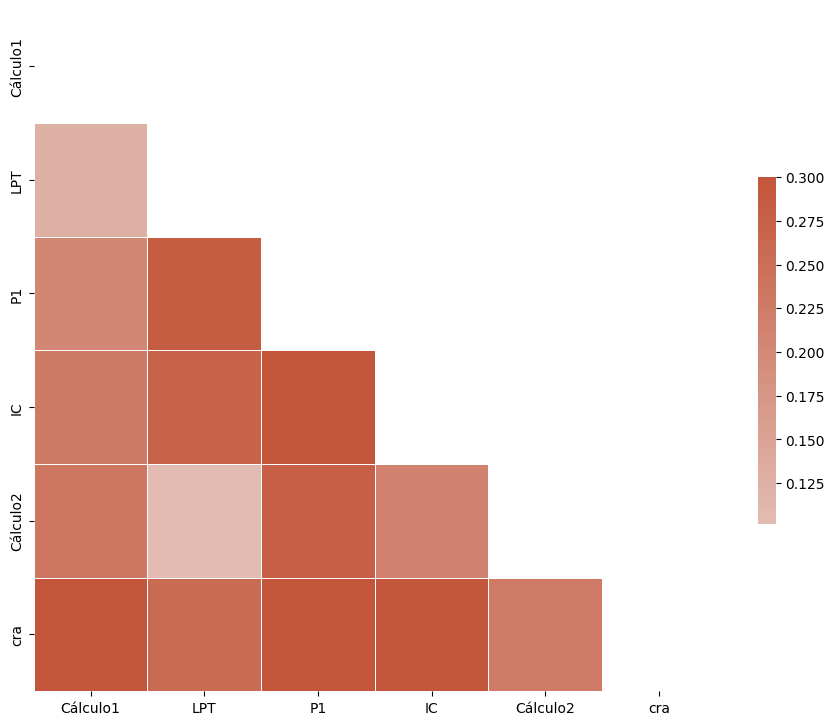

In [68]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Variável melhor correlacionada - IC

In [69]:
def train(x_train, x_test, y_train, y_test, columns):
  new_x_train = x_train[columns].values.reshape(-1, len(columns))
  new_x_test = x_test[columns].values.reshape(-1, len(columns))
  regr = LinearRegression()
  regr.fit(new_x_train, y_train)
  predicted = regr.predict(new_x_test)
  mse = mean_squared_error(y_test, predicted)
  r2 = r2_score(y_test, predicted)
  return mse, r2

columns = ['IC'] # Melhor correlacionada
mse, r2 = train(x_train, x_test, y_train, y_test, columns)
print("MSE: " + str(mse))
print("R2: " + str(r2))

MSE: 0.1716338423872223
R2: 0.4826039994445386


 # Três variáveis melhores correlacionadas - IC, P1, CÁLCULO 1

In [70]:
columns = ['IC', 'P1', 'Cálculo1'] # Três melhores correlacionadas
mse, r2 =train(x_train, x_test, y_train, y_test, columns)
print("MSE: " + str(mse))
print("R2: " + str(r2))

MSE: 0.173170089238187
R2: 0.47797293155315035


# Todas as variáveis

In [71]:
columns = x_train.columns # Todas Variáveis
mse, r2 = train(x_train, x_test, y_train, y_test, columns)
print("MSE: " + str(mse))
print("R2: " + str(r2))

MSE: 0.194556126597303
R2: 0.4135040013967509


# Comparação dos Modelos

- ### O modelo treinado com a variável mais correlacionada foi o melhor modelo, visto que ele possui o menor R2 e o menor MSE.

# 10 partições aleatórias de treino e teste para cada modelo

In [76]:
r2_m1 = []
r2_m2 = []
r2_m3 = []

mse_m1 = []
mse_m2 = []
mse_m3 = []

for i in range(10):
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

  columns = ['IC']
  mse, r2 = train(x_train, x_test, y_train, y_test, columns)
  mse_m1.append(mse)
  r2_m1.append(r2)

  columns = ['IC', 'P1', 'Cálculo1']
  mse, r2 = train(x_train, x_test, y_train, y_test, columns)
  mse_m2.append(mse)
  r2_m2.append(r2)

  columns = x_train.columns
  mse, r2 = train(x_train, x_test, y_train, y_test, columns)
  mse_m3.append(mse)
  r2_m3.append(r2)

r2_m1 = np.mean(r2_m1)
r2_m2 = np.mean(r2_m2)
r2_m3 = np.mean(r2_m3)

mse_m1 = np.mean(mse_m1)
mse_m2 = np.mean(mse_m2)
mse_m3 = np.mean(mse_m3)

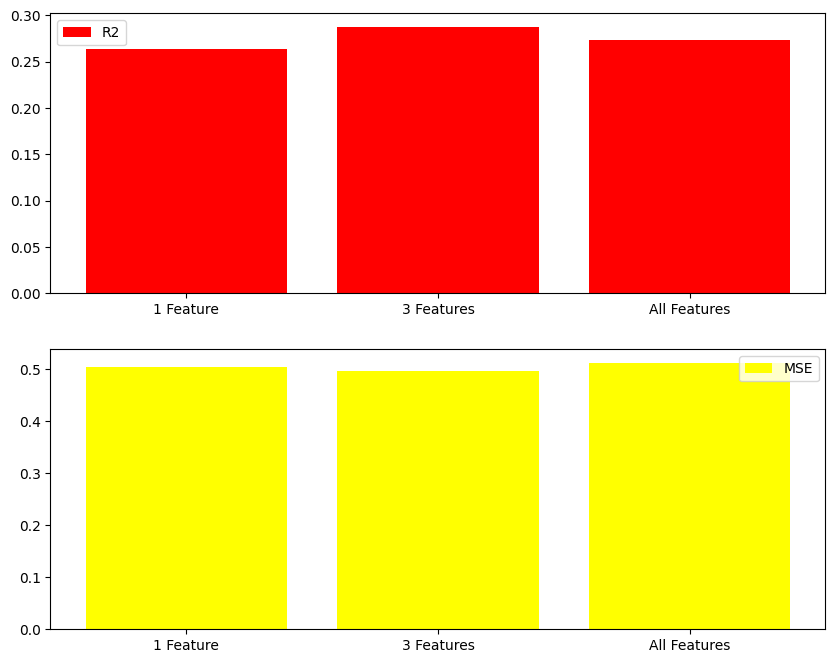

In [77]:
import matplotlib.pyplot as plt 

data1 = [r2_m1,r2_m2,r2_m3]
data2 = [mse_m1,mse_m2,mse_m3]
models = ["1 Feature","3 Features","All Features"]

fig,ax = plt.subplots(2, 1, figsize=(10,8))

ax[0].bar(models,data1,color="red")
ax[0].legend(["R2"])

ax[1].bar(models,data2,color="yellow")
ax[1].legend(["MSE"])

plt.show()